# Sklearn Random Forest Regression for dp0 data

###### Load modules 

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [13]:


%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split

# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle5 as Pickle

### Import data

In [15]:
date = "20230109"

In [16]:
#csv_file = r"F:\cdu\data\zonal_stats\output\merged_slats_field_nt_mosaic_clean_start_all_values.csv"
#csv_file = r"E:\cdu\data\zonal_stats\output\merged_slats_field_agb_dp1_start.csv"
# csv_file = r"F:\cdu\data\zonal_stats\output\20230104\dja_dbi_dim_dis_dka_stc_h99a2_fpca2_dry_indicies_clean.csv".format(date)
csv_file = r"F:\cdu\data\zonal_stats\output\{0}\dja_dbi_dim_dis_dka_stc_h99a2_fpca2_dry_indicies_clean.csv".format(date)

## Set output file locations

In [17]:
output_ = r"F:\cdu\data\zonal_stats\output\{0}\plots".format(date)
output_dir = r"F:\cdu\data\zonal_stats\output\{0}".format(date)

In [18]:
if not os.path.isdir(output_):
    os.mkdir(output_)

In [19]:
# read as dataframe and copy
df1 = pd.read_csv(csv_file, header=0) # the first row is read in as the header for you columns
print(df1.shape) # prints out the number of rows and columns in your csv file 
print(list(df1))
df1.shape
df2 = df1.copy()

(167, 184)
['uid', 'site', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'geometry', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_db

In [20]:
# drop_list = ['dis_one', 'dis_two', 'dis_three', 'dis_four', 'dis_five', 'dis_six', 'dis_seven', 'dis_eight', 'dis_nine', 'dis_ten',
#  'dka_jan', 'dka_feb', 'dka_mar', 'dka_april', 'dka_may', 'dka_june', 'dka_july', 'dka_aug', 'dka_sep', 'dka_oct', 'dka_nov', 'dka_dec',
#     'stc_one', 'stc_two', 'stc_three', 'stc_four', 'stc_five', 'stc_six', 'stc_seven', 'stc_eight', 'stc_nine', 'stc_ten', 'stc_elev', 
#     'stc_twelv', 'stc_thirt', 'stc_fourt', 'stc_fift', 'stc_sixt', 'stc_sevent', 'dka_sum', 'dka_sum.1', 'dka_sum.2', 'dka_sum.3', 
#              'stc_sum', 'stc_sum.1', 'stc_sum.2', 'stc_sum.3']


In [21]:
# # Drop multiple columns
# df2.drop(drop_list, axis = 1, inplace=True)

In [22]:
print(list(df2.columns))

['uid', 'site', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'geometry', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5

In [23]:
select_carbon_df = df2[['site', 'date', 'c_agb_kg1ha', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 
                 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 
                 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 
                 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 
                 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 
                 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 
                 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', 'b5_dbi_max', 
                 'b5_dbi_mean', 'b5_dbi_med', 'b5_dbi_std', 'b5_dbi_p25', 'b5_dbi_p50', 'b5_dbi_p75', 'b5_dbi_p95', 'b5_dbi_p99', 
                 'b6_dbi_min', 'b6_dbi_max', 'b6_dbi_mean', 'b6_dbi_med', 'b6_dbi_std', 'b6_dbi_p25', 'b6_dbi_p50', 'b6_dbi_p75', 
                 'b6_dbi_p95', 'b6_dbi_p99', 'b1_dim_min', 'b1_dim_max', 'b1_dim_mean', 'b1_dim_med', 'b1_dim_std', 'b1_dim_p25', 
                 'b1_dim_p50', 'b1_dim_p75', 'b1_dim_p95', 'b1_dim_p99', 'b2_dim_min', 'b2_dim_max', 'b2_dim_mean', 'b2_dim_med', 
                 'b2_dim_std', 'b2_dim_p25', 'b2_dim_p50', 'b2_dim_p75', 'b2_dim_p95', 'b2_dim_p99', 'b3_dim_min', 'b3_dim_max', 
                 'b3_dim_mean', 'b3_dim_med', 'b3_dim_std', 'b3_dim_p25', 'b3_dim_p50', 'b3_dim_p75', 'b3_dim_p95', 'b3_dim_p99', 
                 'dis_min', 'dis_max', 'dis_mean', 'dis_med', 'dis_major', 'dis_minor', 'dka_min', 'dka_max', 'dka_mean', 'dka_med', 
                 'dka_major', 'dka_minor', 'stc_min', 'stc_max', 'stc_mean', 'stc_med', 'stc_major', 'stc_minor', 'h99a2_min', 
                 'h99a2_max', 'h99a2_mean', 'h99a2_med', 'h99a2_std', 'h99a2_p25', 'h99a2_p50', 'h99a2_p75', 'h99a2_p95', 
                 'h99a2_p99', 'fpca2_min', 'fpca2_max', 'fpca2_mean', 'fpca2_med', 'fpca2_std', 'fpca2_p25', 'fpca2_p50', 
                 'fpca2_p75', 'fpca2_p95', 'fpca2_p99', 'fpca2_imdate', 'ratio32m', 'ratio42m', 'ratio43m', 'ratio52m', 'ratio53m', 
                 'ratio54m', 'ratio62m', 'ratio63m', 'ratio64m', 'ratio65m', 
                 'GSAVIm', 'GNDVIm', 'CVIm', 'NDGIm', 'RIm', 'NBRm', 'NDIIm', 'GDVIm', 'MSAVIm', 'DVIm', 'SAVIm', 'NDVIm', 'MSRm']]

In [24]:
select_agb_df = df2[['site', 'date',  'bio_agb_kg1ha','b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 
                 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 
                 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 
                 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 
                 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 
                 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 
                 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', 'b5_dbi_max', 
                 'b5_dbi_mean', 'b5_dbi_med', 'b5_dbi_std', 'b5_dbi_p25', 'b5_dbi_p50', 'b5_dbi_p75', 'b5_dbi_p95', 'b5_dbi_p99', 
                 'b6_dbi_min', 'b6_dbi_max', 'b6_dbi_mean', 'b6_dbi_med', 'b6_dbi_std', 'b6_dbi_p25', 'b6_dbi_p50', 'b6_dbi_p75', 
                 'b6_dbi_p95', 'b6_dbi_p99', 'b1_dim_min', 'b1_dim_max', 'b1_dim_mean', 'b1_dim_med', 'b1_dim_std', 'b1_dim_p25', 
                 'b1_dim_p50', 'b1_dim_p75', 'b1_dim_p95', 'b1_dim_p99', 'b2_dim_min', 'b2_dim_max', 'b2_dim_mean', 'b2_dim_med', 
                 'b2_dim_std', 'b2_dim_p25', 'b2_dim_p50', 'b2_dim_p75', 'b2_dim_p95', 'b2_dim_p99', 'b3_dim_min', 'b3_dim_max', 
                 'b3_dim_mean', 'b3_dim_med', 'b3_dim_std', 'b3_dim_p25', 'b3_dim_p50', 'b3_dim_p75', 'b3_dim_p95', 'b3_dim_p99', 
                 'dis_min', 'dis_max', 'dis_mean', 'dis_med', 'dis_major', 'dis_minor', 'dka_min', 'dka_max', 'dka_mean', 'dka_med', 
                 'dka_major', 'dka_minor', 'stc_min', 'stc_max', 'stc_mean', 'stc_med', 'stc_major', 'stc_minor', 'h99a2_min', 
                 'h99a2_max', 'h99a2_mean', 'h99a2_med', 'h99a2_std', 'h99a2_p25', 'h99a2_p50', 'h99a2_p75', 'h99a2_p95', 
                 'h99a2_p99', 'fpca2_min', 'fpca2_max', 'fpca2_mean', 'fpca2_med', 'fpca2_std', 'fpca2_p25', 'fpca2_p50', 
                 'fpca2_p75', 'fpca2_p95', 'fpca2_p99', 'fpca2_imdate', 'ratio32m', 'ratio42m', 'ratio43m', 'ratio52m', 'ratio53m', 
                 'ratio54m', 'ratio62m', 'ratio63m', 'ratio64m', 'ratio65m', 
                 'GSAVIm', 'GNDVIm', 'CVIm', 'NDGIm', 'RIm', 'NBRm', 'NDIIm', 'GDVIm', 'MSAVIm', 'DVIm', 'SAVIm', 'NDVIm', 'MSRm']]

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Columns: 184 entries, uid to MSRm
dtypes: float64(156), int64(25), object(3)
memory usage: 240.2+ KB


### Set variables to plot

In [26]:
# predicted value is x
value_x = 'bio_agb_kg1ha'
# variable is y
value_y = "fpca2_p50"
value_a = 'h99a2_p95'
value_b = 'stc_med'


In [27]:
value_y

'fpca2_p50'

In [28]:
df2.shape

(167, 184)

In [29]:
def save_fig(value_x, value_y):
    # Output to file
    output_file(os.path.join(output_,'all_sites_{0}_{1}.html'.format(value_x, value_y)),
                title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


    #Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

    #print(test)
    # Format the tooltip
    tooltips = [
                ('Site', '@site'),
                ('Date', '@date'),
                (value_x, '@{0}'.format(value_x)),
                (value_y, '@{0}'.format(value_y)),   
                (value_a, '@{0}'.format(value_a)),
                (value_b, '@{0}'.format(value_b)) 
               ]

    # Create the figure
    fig = figure(plot_height=400,
                 plot_width=1500,
                 y_axis_label= value_y.replace("_", " "), 
                 x_axis_label= value_x.replace("_", " "),
                 title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
                 toolbar_location='below',
                 tools=select_tools)

    # # Format the y-axis tick label
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

    # Add square representing each site
    fig.square(x= value_x,
               y= value_y,
               source=df2.round(4),
               size=5,
               color='royalblue',
               selection_color='deepskyblue',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=tooltips))

    # Visualize
    save(fig)

In [30]:
save_fig(value_x, value_y)

In [31]:
# save out biken figures
column_list = select_agb_df.columns.to_list()
y_list = column_list[3:]
value_x = column_list[2:3][0]


for i in y_list:
    value_y = i
    save_fig(value_x, value_y)
    

In [33]:
# print(column_list[3:])
# print(column_list[2:3])

['b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', 'b5_dbi_max', 'b5_dbi_mean', 'b5_dbi_med', 'b5_dbi_std', 'b5_dbi_p25', 'b5_dbi_p50', 'b5_dbi_p75', 'b5_dbi_p95', 'b5_dbi_p99', 'b6_dbi_min', 'b6_dbi_max', 'b6_dbi_mean', 'b6_dbi_med', 'b6_dbi_std', 'b6_dbi_p25', 'b6_dbi_p50', 'b6_dbi_p75', 'b6_dbi_p95', 'b6_dbi_p99', 'b1_dim_min'

### Drop AGB numbers which are high

In [ ]:
# # drop the 7 tern sites that apear to be outliers
# df3 =df2[df2[value_x] <= 100000]
# df3.to_csv(os.path.join(output_, "{0}_lt_100000.csv".format(value_x)))
# drop_sites =df2[df2[value_x] > 100000]
# drop_sites.value_counts(['site', value_x, value_y])


In [ ]:
# df3.shape

In [ ]:

# # Output to file
# output_file(os.path.join(output_, 'TERN7_removed_sites_{0}_{1}.html'.format(value_x, value_y)),
#             title='Seven TERN sites removed - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


# #Specify the selection tools to be made available
# select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

# # Format the tooltip
# tooltips = [
#             ('Site', '@site'),
#             ('Date', '@date'),
#             (value_x, '@{0}'.format(value_x)),
#             (value_y, '@{0}'.format(value_y)),
#             (value_a, '@{0}'.format(value_a)),
#             (value_b, '@{0}'.format(value_b)) 
#            ]

# # Create the figure
# fig = figure(plot_height=400,
#              plot_width=1500,
#              y_axis_label= value_y.replace("_", " "), 
#              x_axis_label= value_x.replace("_", " "),
#              title='Seven TERN sites removed - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
#              toolbar_location='below',
#              tools=select_tools)

# # # Format the y-axis tick label
# fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

# # Add square representing each site
# fig.square(x= value_x,
#            y= value_y,
#            source=df3,
#            size=5,
#            color='royalblue',
#            selection_color='deepskyblue',
#            nonselection_color='lightgray',
#            nonselection_alpha=0.3)

# # Add the HoverTool to the figure
# fig.add_tools(HoverTool(tooltips=tooltips))

# # Visualize
# show(fig)

### Drop the TERN sites for review

In [ ]:
# # drop the TERN sites due to 
# df4=df3[df3.site.apply(lambda x: len(str(x))<=9)]
# df4.to_csv(os.path.join(output_, "{0}_NTH_only_lt_100000.csv".format(value_x)))

In [ ]:
# df4.sample(5)

In [ ]:
# df4.shape

In [ ]:

# # Output to file
# output_file(os.path.join(output_, 'ntg_sites_agb_{0}_{1}.html'.format(value_x, value_y)),
#             title='NTG sites only - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))

# #Specify the selection tools to be made available
# select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

# # Format the tooltip
# tooltips = [
#             ('Site', '@site'),
#             ('Date', '@date'),
#             (value_x, '@{0}'.format(value_x)),
#             (value_y, '@{0}'.format(value_y)),
#             (value_a, '@{0}'.format(value_a)),
#             (value_b, '@{0}'.format(value_b)) 
#            ]

# # Create the figure
# fig = figure(plot_height=400,
#              plot_width=1500,
#              y_axis_label= value_y.replace("_", " "), 
#              x_axis_label= value_x.replace("_", " "),
#              title='NTG sites only - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
#              toolbar_location='below',
#              tools=select_tools)

# # # Format the y-axis tick label
# fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

# # Add square representing each site
# fig.square(x= value_x,
#            y= value_y,
#            source=df4,
#            size=5,
#            color='royalblue',
#            selection_color='deepskyblue',
#            nonselection_color='lightgray',
#            nonselection_alpha=0.3)

# # Add the HoverTool to the figure
# fig.add_tools(HoverTool(tooltips=tooltips))

# # Visualize
# show(fig)

## Choose which data set to run the models from

In [34]:
df_ml = select_agb_df

In [35]:
print(list(df_ml.columns))

['site', 'date', 'bio_agb_kg1ha', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', 'b5_dbi_max', 'b5_dbi_mean', 'b5_dbi_med', 'b5_dbi_std', 'b5_dbi_p25', 'b5_dbi_p50', 'b5_dbi_p75', 'b5_dbi_p95', 'b5_dbi_p99', 'b6_dbi_min', 'b6_dbi_max', 'b6_dbi_mean', 'b6_dbi_med', 'b6_dbi_std', 'b6_dbi_p25', 'b6_dbi_p50', 'b6_dbi_p75', 'b6_dbi

In [36]:
# drop some of the unwanted values
df_ml.drop(['date', 'site', 'fpca2_imdate'], axis=1, inplace=True)
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

C:\Users\rmcgr\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
print(list(df_ml))

['bio_agb_kg1ha', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', 'b5_dbi_max', 'b5_dbi_mean', 'b5_dbi_med', 'b5_dbi_std', 'b5_dbi_p25', 'b5_dbi_p50', 'b5_dbi_p75', 'b5_dbi_p95', 'b5_dbi_p99', 'b6_dbi_min', 'b6_dbi_max', 'b6_dbi_mean', 'b6_dbi_med', 'b6_dbi_std', 'b6_dbi_p25', 'b6_dbi_p50', 'b6_dbi_p75', 'b6_dbi_p95', 'b6_dbi_p

In [38]:
df_ml.shape

(167, 162)

In [39]:
df_ml.head(5)

,bio_agb_kg1ha,b1_dja_min,b1_dja_max,b1_dja_mean,b1_dja_med,b1_dja_std,b1_dja_p25,b1_dja_p50,b1_dja_p75,b1_dja_p95,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0.00,21.00,29.00,26.38,27.50,2.60,24.75,27.50,28.25,29.00,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0.00,2.00,5.00,3.55,4.00,0.92,3.00,4.00,4.00,5.00,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0.00,1.00,6.00,3.96,4.00,1.31,3.00,4.00,5.00,6.00,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007
3,0.00,0.00,6.00,3.08,3.00,1.98,1.00,3.00,5.00,6.00,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
4,0.00,0.00,5.00,2.32,2.00,1.43,1.00,2.00,3.00,4.80,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149


In [65]:
df = df_ml[["bio_agb_kg1ha", 'fpca2_mean']]

## Reduce level of 0 values

In [67]:
# # due to the number of field sites with no basal collected data is stratified
no0_df = df_ml[df_ml['bio_agb_kg1ha']>0.0]
# agb_0 = df_ml[df_ml['bio_agb_kg1ha']==0.0].sample(3)
# some0_df = pd.concat([no0_df, agb_0])

## use this for reduced variables
#no0_df = df[df['bio_agb_kg1ha']>0.0]

In [69]:
no0_df = no0_df[["bio_agb_kg1ha", 'fpca2_mean']]
no0_df

,bio_agb_kg1ha,fpca2_mean
7,1894.20,2.86
8,1536.15,NaN
9,1164.24,NaN
10,4736.01,NaN
12,1549.09,NaN
...,...,...
162,20805.22,29.12
163,30472.45,34.75
164,24414.13,14.40
165,17598.35,13.08


## Select the dataset to run the models from

 Define if you are using all variabes or selected variables

In [70]:
# All variables
df = no0_df

# select variables
#df = select_df
df.shape

(110, 2)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 7 to 166
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bio_agb_kg1ha  110 non-null    float64
 1   fpca2_mean     103 non-null    float64
dtypes: float64(2)
memory usage: 2.6 KB


In [72]:
test = df[df[value_x]==0.0]

In [73]:
test.shape

(0, 2)

In [74]:
df.dropna(inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 7 to 166
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bio_agb_kg1ha  103 non-null    float64
 1   fpca2_mean     103 non-null    float64
dtypes: float64(2)
memory usage: 2.4 KB


In [76]:
# col_list = df.columns.to_list()

In [77]:
# variable = col_list[4]
# print(variable)

# Scatter plots with error

In [78]:
# for i in df.columns[1:]:
#     print(i)
#     value_x = 'bio_agb_kg1ha'
#     value_y_loop = str(i)
#     plt.figure(figsize=(10,4))
#     # left plot
#     plt.subplot(1,2,1)
#     sns.regplot(df[value_x], df[value_y_loop], line_kws={"color":"red"})
#     plt.xlabel(value_x)
#     plt.ylabel(value_y_loop)
#     plt.title("Regression {0} and {1}".format(value_x, value_y_loop))
    
#     slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y_loop])

#     print("slope: ", slope)
#     print("intersept: ", intercept)
#     print("r2: ", r_value)
#     print("P_value: ", p_value)
#     print("std error: ", std_err)

#     # right plot
#     plt.subplot(1,2,2)
#     sns.regplot(df[value_x], df[value_y_loop], lowess=True, line_kws={"color":"green"})
#     plt.xlabel(value_x)
#     plt.ylabel("Error")
#     plt.title("Residual Error {0} and {1}".format(value_x, value_y_loop))
#     plt.tight_layout()
#     plt.show()
    
# #     slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

# #     print("slope: ", slope)
# #     print("intersept: ", intercept)
# #     print("r2: ", r_value)
# #     print("P_value: ", p_value)
# #     print("std error: ", std_err)

slope:  0.0009556744982853577
intersept:  5.8145938910339545
r2:  0.6970584276579199
P_value:  2.879997355808529e-16
std error:  9.781556391202775e-05


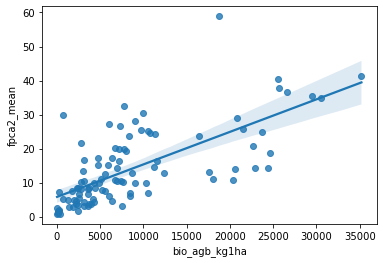

In [79]:
value_x = 'bio_agb_kg1ha'
value_y = 'fpca2_mean'
sns.regplot(x= value_x, y=value_y, data=df)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

print("slope: ", slope)
print("intersept: ", intercept)
print("r2: ", r_value)
print("P_value: ", p_value)
print("std error: ", std_err)

In [81]:
# value_x = 'bio_agb_kg1ha'
# value_y = 'b2_dbi_mean'
# sns.scatterplot(x= value_x, y=value_y, data=df)
# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

# print("slope: ", slope)
# print("intersept: ", intercept)
# print("r2: ", r_value)
# print("P_value: ", p_value)
# print("std error: ", std_err)

In [96]:
#dataset = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:, 0:1].values
y = df.iloc[:, 1:2].values

In [97]:
X

array([[1.89420000e+03],
       [1.29360000e+03],
       [2.54084600e+03],
       [1.79666667e+03],
       [2.35722667e+03],
       [1.92099600e+03],
       [2.60876000e+03],
       [2.83321325e+03],
       [2.38959933e+03],
       [2.14691400e+04],
       [3.74220000e+03],
       [1.11804000e+04],
       [2.26993900e+04],
       [4.87277700e+03],
       [3.15690200e+03],
       [5.58814200e+03],
       [8.03145000e+03],
       [7.65854250e+03],
       [3.12312000e+03],
       [7.71129333e+03],
       [1.79947600e+04],
       [3.91545000e+03],
       [3.51997100e+04],
       [4.37091200e+03],
       [2.21529000e+03],
       [7.20319600e+03],
       [6.89920000e+02],
       [3.61583250e+03],
       [6.04473800e+03],
       [5.60643844e+03],
       [3.66879333e+03],
       [8.37621610e+03],
       [2.46708000e+04],
       [3.08616000e+03],
       [2.95218000e+04],
       [2.83203200e+03],
       [6.65280000e+02],
       [6.00600000e+03],
       [6.36020000e+03],
       [5.17370700e+03],


In [100]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [103]:
y

array([[-0.99385905],
       [-0.79611862],
       [-0.7664007 ],
       [-0.55956535],
       [-0.47849166],
       [-0.80739723],
       [-0.66040312],
       [-0.51066017],
       [-0.47456184],
       [ 1.09261868],
       [-0.48174885],
       [ 0.07180873],
       [ 0.62755666],
       [-0.34620041],
       [-0.30455279],
       [-0.1008383 ],
       [ 0.51023026],
       [-0.31546231],
       [-0.95717605],
       [ 0.5568815 ],
       [-0.24013331],
       [-0.90562753],
       [ 2.51097179],
       [-0.48847208],
       [-0.9114752 ],
       [ 0.23277013],
       [-0.78458167],
       [-0.6603773 ],
       [-0.70145982],
       [-0.5804217 ],
       [-0.92474905],
       [ 0.89357559],
       [ 0.45691062],
       [ 0.24966534],
       [ 1.96125536],
       [-0.31958287],
       [ 1.46157312],
       [ 1.21809685],
       [ 0.31109218],
       [-0.53724734],
       [-0.9456122 ],
       [ 1.01398004],
       [-0.35868225],
       [-0.61207028],
       [ 2.17098842],
       [ 0

In [107]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y.ravel())

SVR()

In [108]:
y_pred = regressor.predict(6.5)
y_pred = sc_y.inverse_transform(y_pred) 

ValueError: Expected 2D array, got scalar array instead:
array=6.5.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [109]:
# randomly split data into train and test datasets, the user needs to define the variables 

# Two example of how you can call the predictor variables 

#xdata1 = df4[df4.columns[12:]].astype('float32')

#xdata1 = df[['psB2a', 'psB3a', 'psB4a', 'psB5a', 'psB6a', 'ratio32a', 'ratio42a', 'ratio43a', 'ratio52a', 'ratio53a', 'ratio54a', 'ratio62a', 'ratio63a', 'ratio64a', 'ratio65a', 'GSAVIa', 'GNDVIa', 'CVIa', 'NDGIa', 'RIa', 'NBRa', 'NDIIa', 'GDVIa', 'MSAVIa', 'DVIa', 'SAVIa', 'NDVIa', 'MSRa', 'psB2d', 'psB3d', 'psB4d', 'psB5d', 'psB6d', 'ratio32d', 'ratio42d', 'ratio43d', 'ratio52d', 'ratio53d', 'ratio54d', 'ratio62d', 'ratio63d', 'ratio64d', 'ratio65d', 'GSAVId', 'GNDVId', 'CVId', 'NDGId', 'RId', 'NBRd', 'NDIId', 'GDVId', 'MSAVId', 'DVId', 'SAVId', 'NDVId', 'MSRd']].astype('float32')
#xdata1 = df[['psB1a', 'psB2a', 'psB3a', 'psB4a', 'psB5a', 'psB6a', 'ratio32fa', 'ratio42fa', 'ratio43fa', 'ratio52fa', 'ratio53fa', 'ratio54fa', 'ratio62fa', 'ratio63fa', 'ratio64fa', 'ratio65fa', 'ratio32a', 'ratio42a', 'ratio43a', 'ratio52a', 'ratio53a', 'ratio54a', 'ratio62a', 'ratio63a', 'ratio64a', 'ratio65a', 'GSAVIfa', 'GSAVIa', 'GNDVIfa', 'GNDVIa', 'CVIfa', 'CVIa', 'NDGIfa', 'NDGIa', 'RIfa', 'RIa', 'NBRfa', 'NBRa', 'NDIIfa', 'NDIIa', 'GDVIfa', 'GDVIa', 'MSAVIfa', 'MSAVIa', 'DVIfa', 'DVIa', 'SAVIfa', 'SAVIa', 'NDVIfa', 'NDVIa', 'MSRfa', 'MSRa']]
xdata1 = df.iloc[:, 1:].astype('float32')
ydata1 = df[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(72, 1) (72,)
(31, 1) (31,)


In [111]:
ydata1

,bio_agb_kg1ha
7,1894.20
18,1293.60
19,2540.85
20,1796.67
21,2357.23
...,...
162,20805.22
163,30472.45
164,24414.13
165,17598.35


### Plot up Histograms of Lidar meanCHM for train and test datasets

In [ ]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

SVR regressor: https://towardsdatascience.com/unlocking-the-true-power-of-support-vector-regression-847fd123a4a0#:~:text=Support%20Vector%20Regression%20is%20a,the%20maximum%20number%20of%20points.

In [115]:
from sklearn.svm import SVR
rfrModel_1 = SVR(kernel = 'rbf')
#regressor.fit(X, y.ravel())

In [ ]:
rng = np.random.RandomState(1)
rfrModel_1 = abr(dtr(max_depth=4), n_estimators=300, random_state=rng)
rfrModel_1

In [ ]:
rfrModel_1 = gbr(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=0, loss='ls')
rfrModel_1

In [ ]:
# rfrModel_1 = etr(n_estimators=100, bootstrap=True, oob_score=True,  max_features='log2', min_samples_split=1,n_jobs=-1) 
# rfrModel_1

In [ ]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [ ]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True) #,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [ ]:
np.nan_to_num(X_1)

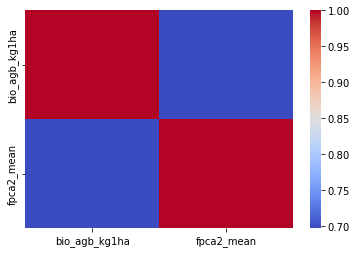

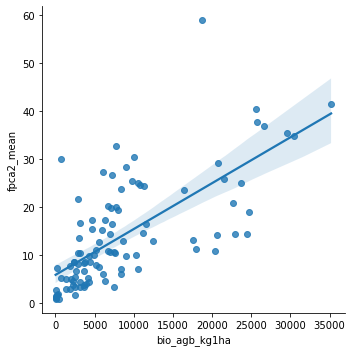

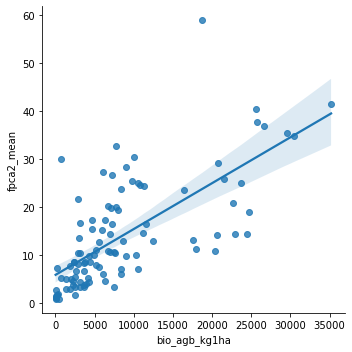

In [138]:
#Visualise the data
plt.figure()
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()
sns.lmplot(x='bio_agb_kg1ha', y='fpca2_mean', data=df)
sns.lmplot(x='bio_agb_kg1ha', y='fpca2_mean', data=df)

In [140]:
#Split the dataset into training and testing data
import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, train_size=0.70) 
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state = 0)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)


ModuleNotFoundError: No module named 'train_test_split'

In [ ]:
# Fit the model over the training data
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [116]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

In [117]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')
plt.show()

AttributeError: 'SVR' object has no attribute 'feature_importances_'

In [118]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

plt.show()
fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 

NameError: name 'fiResult' is not defined

In [119]:
df_band.info()

NameError: name 'df_band' is not defined

In [120]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

NameError: name 'dfsort' is not defined

In [121]:
df_var = dfsort[dfsort['n'] > 0.01]

NameError: name 'dfsort' is not defined

In [122]:
column_var = df_var.band.tolist()

NameError: name 'df_var' is not defined

In [123]:
column_var.insert(0, 'bio_agb_kg1ha')

NameError: name 'column_var' is not defined

In [124]:
column_var

NameError: name 'column_var' is not defined

In [125]:
df

,bio_agb_kg1ha,fpca2_mean
7,1894.20,2.86
18,1293.60,5.03
19,2540.85,5.36
20,1796.67,7.64
21,2357.23,8.53
...,...,...
162,20805.22,29.12
163,30472.45,34.75
164,24414.13,14.40
165,17598.35,13.08


In [126]:
df = df_ml[column_var]

NameError: name 'column_var' is not defined

In [127]:
df_corr = df.corr()
df_corr

,bio_agb_kg1ha,fpca2_mean
bio_agb_kg1ha,1.00,0.70
fpca2_mean,0.70,1.00


In [128]:
dfsort.to_csv(os.path.join(output_, "rf_variable_score.csv"))

NameError: name 'dfsort' is not defined

In [129]:
variable_imp_list = dfsort.band.to_list()

NameError: name 'dfsort' is not defined

In [130]:
# var_not_imp = variable_imp_list[20:]
# print(list(var_not_imp))

### Predict the selected model on the test data

In [131]:
# plt.scatter(y2_predict, y_2)
# plt.show()

Predicted data r2 = -0.08673277754840325
MSE = 62046902.072
RMSE = 7876.986
bias = 2245.211
n = 31


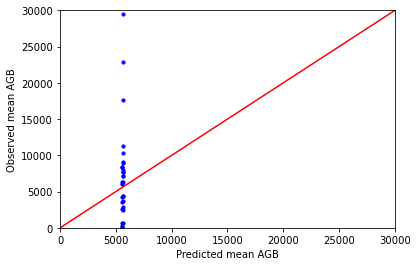

In [132]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

plt.show()

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = y2_predict
y = y_2

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

print(x)
print(y)
print(z)
# fig, ax = plt.subplots()
# ax.scatter(x, y, c=z, s=0.8, edgecolor='')

# # data for the 1 for 1 line
# a = [-1,25]
# b = [-1,25]

# #sets the limits of the axis
# plt.xlim(-1,25)
# plt.ylim(-1,25)
# plt.ylabel('Observed mean CHM')
# plt.xlabel('Predicted mean CHM')
# # 1 for 1 line
# ax.plot(a, b, color = 'black')

# plt.show()

[5607.22691095 5604.30854669 5617.57582613 5617.09474746 5620.9317811
 5620.41717873 5622.05084957 5612.1589356  5621.7512428  5613.95234972
 5619.14927306 5617.78252045 5618.2992293  5596.3146546  5589.22331648
 5596.28608989 5590.6788513  5597.40895331 5587.57594728 5587.01301206
 5587.11736523 5596.24156983 5587.67174543 5588.20761532 5593.48215059
 5589.23891857 5587.07426546 5587.50034024 5593.32012927 5588.40673929
 5593.16997693]
[2.2881072e+04 1.7598352e+04 3.0472447e+04 2.9521801e+04 6.6528003e+02
 2.8244580e+03 1.1338128e+04 7.2031958e+03 8.9849092e+03 6.3602002e+03
 7.7153999e+03 8.0314502e+03 7.1505176e+03 1.0273340e+04 8.4028086e+03
 9.0309453e+03 8.4137900e+03 7.6585425e+03 1.8480000e+01 5.5439999e+01
 2.9567999e+02 4.3276240e+03 6.3756001e+03 6.8991998e+02 2.3895994e+03
 6.0447378e+03 3.6036001e+03 4.2688799e+03 3.7422000e+03 2.5408459e+03
 4.3709121e+03]
[3.31289663e-07 3.70245484e-07 3.73485326e-07 3.87103012e-07
 4.41116708e-07 6.64768595e-07 8.42387054e-07 9.40621859

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [ ]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

with open('rfr_modelName_nt100_n17', 'wb') as f:
    pickle.dump(rfrLCHM, f)

In [ ]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model

df = pd.read_csv(csv_file, header=0)
df.shape 

In [ ]:
c_list = df.columns.tolist()
c_list

In [ ]:
#df1 = df[(df['comp'] == 'l57')]
df1 = df[(df['bio_agb_kg1ha'] > 0.01)]
df1.dropna(inplace=True)
print (df1.shape)

In [ ]:
df1.columns

In [ ]:
column_var

In [ ]:
df1[column_var].info()

In [ ]:
df1

In [ ]:
xdata2 = df1[column_var].astype('float32')

ydata1 = df1[['bio_agb_kg1ha']].astype('float32')

ydata2 = ydata1.values

ydata = ydata2.ravel()

print(len(ydata1))

In [ ]:
with open('rfr_modelName_nt100_n17', 'rb') as f:
        rf = pickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print('Predicted data r2 =', rf.score(xdata2, ydata))
print('MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f'))
print('explained_var =',format(explained_variance_score(ydata, predicted),  '.3f'))
print('bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f'))
print('n =' , len(ydata))


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=8, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1, 40000)
plt.ylim(-1, 40000)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_78.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelName_mKath', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_l57.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validationgtr4m.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel78', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()